### Sentiment Analyzer of Yelp Reviews

The dataset consists of positive and negative reviews in 2 CSV files; positivedata.csv and negativedata.csv.
The csv files were text files and there were no tags of whether the review was positive or negative.

### First attempt at building the sentiment analyzer

In [1]:
import pandas as pd
import numpy as np

In [2]:
## load the positive reviews data and remove some of the empty lines of data

with open('positivedata.csv', 'rU') as f:
    file1 = [row for row in f]
    file1 = map(lambda s: s.strip(), file1)
    file1 = filter(None, file1)

In [3]:
## place data in a dataframe and insert the column headings and sentiment tag (1 for positive)

pos_data_df = pd.DataFrame(file1)
pos_data_df.columns = ["reviews"]
pos_data_df.insert(0, "sentiment", 1)

In [6]:
pos_data_df.shape

(2264, 2)

In [5]:
pos_data_df.head()

,sentiment,reviews
0,1,"﻿""Excellent food. Superb customer service. I m..."
1,1,Yes this place is a little out dated and not o...
2,1,"""All the food is great here. But the best thin..."
3,1,"""The dining area is nice. Very family friendly..."
4,1,I highly recommend this place. The mechanics a...


In [7]:
## do similar for negative reviews
with open('negativedata.csv', 'rU') as g:
    file2 = [row for row in g]
    file2 = map(lambda s: s.strip(), file2)
    file2 = filter(None, file2)

In [8]:
# place in dataframe and tag negative sentiment as 0
neg_data_df = pd.DataFrame(file2)
neg_data_df.columns = ["reviews"]
neg_data_df.insert(0, "sentiment", 0)

In [9]:
neg_data_df.shape

(2376, 2)

In [10]:
neg_data_df.head()

,sentiment,reviews
0,0,"﻿""Wing sauce is like water. Pretty much a lot ..."
1,0,"""Owning a driving range inside the city limits..."
2,0,"Bottom line, this place sucks. The best hope ..."
3,0,"""This place is absolute garbage... Half of th..."
4,0,"""My fiancÃ© upgraded his phone at the Apple st..."


In [11]:
## combine the positive and negative reviews into a single dataframe
data = pos_data_df.append(neg_data_df)

In [12]:
## Count the labels in data to verify there are only 0 and 1
data.sentiment.value_counts()

0    2376
1    2264
Name: sentiment, dtype: int64

In [13]:
## How long is the average length of the reviews?
np.mean([len(s.split(" ")) for s in data.reviews])

56.073491379310347

In [14]:
import re, nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

In [15]:
## define stemmer
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

In [16]:
# define tokenizer
def tokenize(text):
    text = re.sub("[^a-zA-Z]", " ", text) #remove all except letters
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [37]:
vectorizer = CountVectorizer(
        analyzer = 'word',
        tokenizer = tokenize,
        lowercase = True,
        stop_words = 'english',
        max_features = 500)

In [38]:
# learn and fit the model/vectorizer and transform corpus into feature vectors

corpus_all_features = vectorizer.fit_transform(data.reviews.tolist())

In [39]:
# make corpus features a numpy array
corpus_all_features = corpus_all_features.toarray()

# print the features
features_corpus = vectorizer.get_feature_names()
print features_corpus

[u'abl', u'absolut', u'actual', u'adopt', u'ago', u'alreadi', u'alway', u'amaz', u'ani', u'anim', u'anoth', u'answer', u'anyon', u'anyth', u'apart', u'apolog', u'appet', u'appoint', u'area', u'arriv', u'ask', u'ate', u'atmospher', u'attent', u'attitud', u'avail', u'avoid', u'aw', u'away', u'awesom', u'bad', u'bar', u'bartend', u'base', u'basic', u'beauti', u'becaus', u'bed', u'beer', u'befor', u'believ', u'best', u'better', u'big', u'bike', u'birthday', u'bit', u'bite', u'bought', u'boyfriend', u'bread', u'breakfast', u'bring', u'brought', u'brunch', u'build', u'burger', u'busi', u'butter', u'buy', u'cake', u'came', u'car', u'card', u'care', u'casbah', u'cash', u'cat', u'chang', u'charg', u'cheap', u'check', u'chees', u'chef', u'chicken', u'chocol', u'choic', u'citi', u'class', u'clean', u'close', u'cloth', u'coffe', u'cold', u'come', u'comfort', u'compani', u'complain', u'complet', u'cook', u'cool', u'cost', u'couldn', u'counter', u'coupl', u'cours', u'cover', u'cream', u'crowd', u'cu

In [40]:
# check there are 100 features
len(features_corpus)

500

In [41]:
# find frequency of features in corpus_all_features
fdist_features = np.sum(corpus_all_features, axis=0)
for word, count in zip(features_corpus, fdist_features):
    print count, word

100 abl
116 absolut
171 actual
54 adopt
86 ago
64 alreadi
342 alway
190 amaz
308 ani
79 anim
285 anoth
59 answer
98 anyon
143 anyth
74 apart
53 apolog
94 appet
91 appoint
173 area
132 arriv
488 ask
71 ate
95 atmospher
57 attent
55 attitud
53 avail
56 avoid
89 aw
185 away
121 awesom
244 bad
247 bar
73 bartend
54 base
53 basic
60 beauti
475 becaus
51 bed
151 beer
309 befor
84 believ
397 best
262 better
144 big
85 bike
78 birthday
102 bit
55 bite
62 bought
55 boyfriend
193 bread
112 breakfast
105 bring
81 brought
62 brunch
70 build
68 burger
299 busi
60 butter
94 buy
130 cake
312 came
361 car
64 card
182 care
90 casbah
55 cash
90 cat
151 chang
128 charg
60 cheap
224 check
204 chees
78 chef
183 chicken
54 chocol
53 choic
76 citi
53 class
123 clean
114 close
60 cloth
209 coffe
130 cold
436 come
50 comfort
72 compani
65 complain
104 complet
131 cook
54 cool
78 cost
116 couldn
91 counter
94 coupl
68 cours
54 cover
77 cream
67 crowd
276 custom
109 cut
231 d
379 day
88 deal
64 decent
126 decid


In [42]:
# Training the data...
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        corpus_all_features, 
        data.sentiment,
        train_size=0.85,
        random_state=1234)

In [43]:
# Create the Log Regression classifier
from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression()
log_mod = log_mod.fit(X_train, y_train)

y_log_pred = log_mod.predict(X_test)

In [44]:
# find classifier precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_log_pred))

             precision    recall  f1-score   support

          0       0.81      0.84      0.83       353
          1       0.83      0.80      0.82       343

avg / total       0.82      0.82      0.82       696



The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The f1-score can be interpreted as a weighted harmonic mean of the precision and recall, where an f1-score reaches its best value at 1 and worst score at 0.

The support is the number of occurrences of each class in `y_true`.

In [45]:
# print sample of predictions
for review, sentiment in zip(data.reviews[15:50], y_log_pred[15:50]):
    print sentiment, review

0 "-Shrimp a few ways (""""Norfolk"""" style is oily for my taste, and I never had it growing up in Norfolk.)"
0 -Hawkins St Special
1 "-Prime Rib (sized for two, watch it)"
0 "The prices are low, the portions are large, and just about everything on the menu  is delicious. I'm not one to pick a place because they give you a lot of food, but if you like a good value and don't want to compromise on taste, this place is a gem."""
0 "Old school.....traditional ""mom 'n pop"" quality and perfection. The best fish and chips you'll ever enjoy and equally superb fried shrimp. A great out of the way, non-corporate, vestige of Americana. You will love it."
0 Seen this restaurant on 25 best places in Pittsburgh with Rick Seback
0 "ack. Went there with my girlfriend she grew up with the owner. She's very nice all employees are super nice service was excellent i had the fish sandwich my girlfriend had the Ruben more than you could possibly eat very reasonable prices. Going back to try the burgers  

## Second attempt
### For the second attempt, the text is 'cleaned' before tagging them with the sentiment. Other classifiers are also used and the accuracy scores are compared.

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk, re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [47]:
## define a function to convert a raw review to a string of words

def review_to_words(raw):
    # Remove quotation marks
    review_text = re.sub(r'^"|"$', '', raw)
    # Remove non-letters
    letters = re.sub("[^a-zA-Z]", " ", review_text)
    # Lower case and split into individual words
    words = letters.lower().split()
    # Convert stop words to a set
    stops = set(stopwords.words("english"))
    # Remove stop words
    relevant_words = [w for w in words if not w in stops]
    # Join words back into one string separated by space, return result
    return( " ".join(relevant_words))

In [48]:
review_to_words(file1[0])

'excellent food superb customer service miss mario machines used still great place steeped tradition'

In [49]:
review_to_words(file2[0])

'wing sauce like water pretty much lot butter hot sauce franks red hot maybe whole wings good size crispy wing sauce could better hot extra hot flavor heat fish sandwich good large portion sides decent'

In [51]:
# Clean the positive and negative reviews
num_pos_reviews = len(file1)
num_neg_reviews = len(file2)

print "Cleaning the set of positive reviews....\n"
# Initialize empty list to hold cleaned positive reviews
clean_pos_reviews = []
for i in xrange(1, num_pos_reviews):
    if ((i+1)%500 == 0):
        print "Review %d of %d\n" % (i+1, num_pos_reviews)
    clean_pos_reviews.append(review_to_words(file1[i]))

# Clean all negative reviews, status updates
print "Cleaning the set of negative reviews....\n"
# Initialize empty list to hold cleaned negative reviews
clean_neg_reviews = []
for i in xrange(1, num_neg_reviews):
    if ((i+1)%500 == 0):
        print "Review %d of %d\n" % (i+1, num_neg_reviews)
    clean_neg_reviews.append(review_to_words(file2[i]))

Cleaning the set of positive reviews....

Review 500 of 2264

Review 1000 of 2264

Review 1500 of 2264

Review 2000 of 2264

Cleaning the set of negative reviews....

Review 500 of 2376

Review 1000 of 2376

Review 1500 of 2376

Review 2000 of 2376



In [52]:
# Create column headings and tag the positive reviews with sentiment 1
pos_data_df = pd.DataFrame(clean_pos_reviews)
pos_data_df.columns = ["reviews"]
pos_data_df.insert(0, "sentiment", 1)

# Create column headings and tag the negative reviews with sentiment 0
neg_data_df = pd.DataFrame(clean_neg_reviews)
neg_data_df.columns = ["reviews"]
neg_data_df.insert(0, "sentiment", 0)

In [54]:
pos_data_df.shape

(2263, 2)

In [57]:
pos_data_df.groupby('sentiment').describe()

reviews
sentiment                   
1         count         2263
          unique        2253
          top     love place
          freq             3

In [56]:
neg_data_df.shape

(2375, 2)

In [58]:
neg_data_df.groupby('sentiment').describe()

reviews
sentiment               
0         count     2375
          unique    2356
          top           
          freq         5

In [59]:
pos_data_df['length'] = pos_data_df['reviews'].map(lambda text: len(text))
print pos_data_df.head(10)

   sentiment                                            reviews  length
0          1  yes place little dated opened weekend staff al...     221
1          1  food great best thing wings wings simply fanta...     149
2          1  dining area nice family friendly bar nice well...     105
3          1  highly recommend place mechanics really honest...      61
4          1  big believer first impressions go new business...     448
5          1  thank rob truly appreciated help received agen...     377
6          1  place delicious parents saw recommendation vis...     635
7          1            miss stop best fish sandwich pittsburgh      39
8          1             place lot reviews glad need get busier      38
9          1  ages looks ambiance bother pretend movie set p...     288


In [60]:
print pos_data_df.tail(10)

      sentiment                                            reviews  length
2253          1  restaurant deserve star rating yelp star ratin...     236
2254          1  husband took year old daughter amazing experie...     255
2255          1  foody family gave gem portuguese mediterranean...     163
2256          1  despite bloody labor battles fought old homest...     239
2257          1  begin tour helen frick art museum located reyn...     291
2258          1  next car carriage museum henry clay frick appa...     181
2259          1  move favorite greenhouse gardens lawns believe...     155
2260          1  finally come house clayton purchased princely ...     176
2261          1  stop frick complete without visiting cafe beli...     442
2262          1  forget tea wonderful service impeccable guests...      75


In [61]:
neg_data_df['length'] = neg_data_df['reviews'].map(lambda text: len(text))
print neg_data_df.head(10)

   sentiment                                            reviews  length
0          0  owning driving range inside city limits like l...     585
1          0  bottom line place sucks best hope owner sells ...     106
2          0  place absolute garbage half tees available inc...     293
3          0  fianc upgraded phone apple store got strange t...     368
4          0  waited mins people ahead finally getting helpe...      51
5          0  understand busy ridiculous work robinson went ...     170
6          0  go place scam comes opening freezing canceling...     163
7          0  used go tires brakes etc prices gone way mid l...     208
8          0  got new tires within two weeks got flat took c...     181
9          0  took tire flynn told someone punctured tire tr...     155


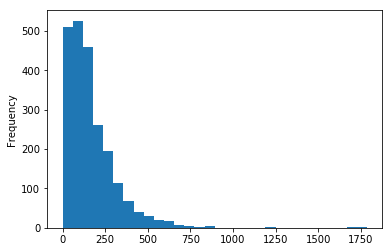

In [64]:
pos_data_df.length.plot(bins=30, kind='hist')

In [65]:
pos_data_df.length.describe()

count    2263.000000
mean      165.048166
std       144.419356
min         0.000000
25%        65.000000
50%       132.000000
75%       222.000000
max      1786.000000
Name: length, dtype: float64

In [67]:
## What is this review with 1786 words long?
print list(pos_data_df.reviews[pos_data_df.length > 1780])

['years ago lost partner love life tragic accident struggling horrific grief difficulty getting back life knew grief counselor suggested help something else order help feel better decided since animal lover would try volunteering animal shelter working lot time wanted shelter feel right visited good work one kept drawing back arl yes building old bit run stop staff administration best little best space saw bathroom renovated vet tech office saw janitor closet renovated made rodent room cats lived cages along halls arl new building next door old gas station made cat adoption center staff still young going years shelter place employment matter know something place right volunteer easily hours week arl get see good bad ugly tell first hand good staff executive director dan rossi work goes animals staff knows every one animals care keep doors wide open domestic wild animals even means staff member volunteer takes cat dog home answer never ever animal also volunteer humane society united st

In [68]:
neg_data_df.length.describe()

count    2375.000000
mean      189.916632
std       182.257559
min         0.000000
25%        70.500000
50%       138.000000
75%       254.000000
max      1784.000000
Name: length, dtype: float64

In [69]:
## What is this negative review with 1786 words long?
print list(neg_data_df.reviews[neg_data_df.length > 1780])

['spoke man morning ice covered parking lot sidewalk business liable customers someone slip fall due negligence business part told good luck liable careful everywhere icy two years gym fed way treat customers told fed since gave hard time towels weeks ago towels since never clean parking lot winter make sure wear boots outside crash car aside gym well gym biggest critic aside rude management negligence would encourage sanitization outside cardio room towels spray around weight machines never issue hate see happen always make sure least wipe sweat marks machine cause well pretty nasty pretty large terms size space anything aside ordinary weights cardio workers well mostly young really care much man told wrong older possibly manager owner tend keep top wash towels even busy pretty annoying cardio room always fox news two tvs middle tv sports center regardless else tv recently even putting pens games stuff must busy watching inch screen lobby workers cardio room max middle sides probably 

In [70]:
# Combine 2 dataframes
data = pos_data_df.append(neg_data_df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x120b5a910>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x120b90d50>], dtype=object)

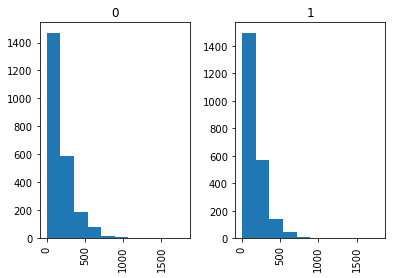

In [74]:
# Compare the histograms by sentiment
data.hist(column='length', by='sentiment', bins=10)

In [75]:
## Create the bag of words with 5000 features

print "Creating the bag of words...\n"
from sklearn.feature_extraction.text import CountVectorizer
# Initialize CountVectorizer object
vectorizer = CountVectorizer(analyzer = 'word',     \
                             tokenizer = tokenize,      \
                             preprocessor = None,   \
                             stop_words = None,     \
                             max_features = 5000)

Creating the bag of words...



In [76]:
# learn and fit the model/vectorizer and transform corpus into feature vectors
corpus_all_features = vectorizer.fit_transform(data.reviews.tolist())

# make corpus features a numpy array
corpus_all_features = corpus_all_features.toarray()

# print the features
features_corpus = vectorizer.get_feature_names()
print features_corpus
len(features_corpus)

[u'aaa', u'aamco', u'aaron', u'ab', u'abandon', u'abd', u'abil', u'abl', u'abruptli', u'absolut', u'absorb', u'abund', u'abus', u'abysm', u'ac', u'accept', u'access', u'accessori', u'accid', u'accident', u'accommod', u'accomod', u'accompani', u'accomplish', u'accord', u'accordingli', u'account', u'accur', u'accus', u'ace', u'acid', u'acknowledg', u'acr', u'across', u'act', u'action', u'activ', u'actor', u'actual', u'ad', u'adam', u'add', u'addict', u'addit', u'address', u'adequ', u'adjac', u'adjust', u'admin', u'admir', u'admit', u'admittedli', u'adopt', u'ador', u'adt', u'adult', u'advanc', u'advantag', u'adventur', u'advers', u'advertis', u'advic', u'advis', u'affair', u'affect', u'afford', u'afraid', u'african', u'aftermarket', u'afternoon', u'afterward', u'age', u'agenc', u'agent', u'aggrav', u'aggress', u'ago', u'agre', u'ah', u'ahead', u'ahi', u'ahold', u'aid', u'aim', u'aime', u'aioli', u'air', u'airi', u'airlin', u'airport', u'aisl', u'aka', u'al', u'ala', u'alan', u'alarm', u'

5000

In [77]:
# Test with LogRegression classifier to see if increase in features increases scores

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(
        corpus_all_features, 
        data.sentiment,
        train_size=0.85,
        random_state=1234)

# Create the Log Regression classifier
from sklearn.linear_model import LogisticRegression

log_mod = LogisticRegression()
log_mod = log_mod.fit(X_train, y_train)

y_log_pred = log_mod.predict(X_test)

# find classifier precision
from sklearn.metrics import classification_report
print(classification_report(y_test, y_log_pred))

             precision    recall  f1-score   support

          0       0.85      0.86      0.85       353
          1       0.85      0.84      0.85       343

avg / total       0.85      0.85      0.85       696



In [79]:
# Find out how other classifiers perform

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import LinearSVC

classifiers = {'Logistic': LogisticRegression(),
               'GaussianNB':GaussianNB(),
               'BernoulliNB': BernoulliNB(),
               'MultinomialNB': MultinomialNB(),
               'Stochastic GD': SGDClassifier()}

In [80]:
from sklearn.metrics import roc_auc_score

for name, clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    print "%s had an accuracy score of %0.2f"% (name, score)

BernoulliNB had an accuracy score of 0.83
GaussianNB had an accuracy score of 0.68
MultinomialNB had an accuracy score of 0.88
Logistic had an accuracy score of 0.85
Stochastic GD had an accuracy score of 0.81


In [81]:
# Will Random Forest or Decision Tree classifiers do better?
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

classifier2 = {'Randomforest':RandomForestClassifier,
               'DecisionTree':DecisionTreeClassifier}

x_train, x_test, y_train, y_test = train_test_split(
        corpus_all_features, 
        data.sentiment,
        train_size=0.85,
        random_state=1234)

for name, model in classifier2.items():
    for i in range(1,41):
        clf=model(max_depth = i)
        clf.fit(x_train, y_train)
        score = clf.score(x_test, y_test)
        print "%s (%s) had an accuracy score of %0.4f"% (name, i, score)

Randomforest (1) had an accuracy score of 0.5618
Randomforest (2) had an accuracy score of 0.6336
Randomforest (3) had an accuracy score of 0.6466
Randomforest (4) had an accuracy score of 0.7098
Randomforest (5) had an accuracy score of 0.6480
Randomforest (6) had an accuracy score of 0.6968
Randomforest (7) had an accuracy score of 0.6997
Randomforest (8) had an accuracy score of 0.7371
Randomforest (9) had an accuracy score of 0.7399
Randomforest (10) had an accuracy score of 0.7543
Randomforest (11) had an accuracy score of 0.7227
Randomforest (12) had an accuracy score of 0.7557
Randomforest (13) had an accuracy score of 0.7486
Randomforest (14) had an accuracy score of 0.7385
Randomforest (15) had an accuracy score of 0.7399
Randomforest (16) had an accuracy score of 0.7672
Randomforest (17) had an accuracy score of 0.7658
Randomforest (18) had an accuracy score of 0.7529
Randomforest (19) had an accuracy score of 0.7816
Randomforest (20) had an accuracy score of 0.7543
Randomfor

Random Forest (max_depth = 39) gives an accuracy of over 0.8 while Decision Tree did not go beyond 0.8.

In [83]:
classifiers3 = {'Logistic': LogisticRegression(),
               'GaussianNB':GaussianNB(),
               'BernoulliNB': BernoulliNB(),
               'MultinomialNB': MultinomialNB(),
               'Stochastic GD': SGDClassifier(),
               'RandomForest': RandomForestClassifier(max_depth = 39)}
for name, clf in classifiers3.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = roc_auc_score(y_test, y_pred)
    print "%s had an accuracy score of %0.2f"% (name, score)

BernoulliNB had an accuracy score of 0.83
RandomForest had an accuracy score of 0.80
GaussianNB had an accuracy score of 0.68
Stochastic GD had an accuracy score of 0.83
Logistic had an accuracy score of 0.85
MultinomialNB had an accuracy score of 0.88


**Multinomial classifier** performed the best for the Sentiment Analyzer.